# PALS

### dudas:
°Por que el espectro de Ni seria una referencia? como lo usamos con referencia? Nuestro es distinto el ploteo que a la figura que mandaron por mail.

-Los datos del Co nos los dieron calibrados? como asociamos los valores del canal de tiempo cero con ese rango en x? 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
PolA=pd.read_csv("PolimA.txt",header=0,delim_whitespace=True)
PolB=pd.read_csv("PolimB.txt",header=0,delim_whitespace=True)
Co=pd.read_csv("Co.txt",header=0,delim_whitespace=True)
# Ni=pd.read_csv("Ni.txt",header=0,delim_whitespace=True) LO LEEMOS MAS ADELANTE


## Calibracion:

50ns = canal 2048 
por canal 0.0244140625ns


24.4 picosegundos/canal

In [3]:
calibracion=0.0244140625
print(PolA.columns)
print(PolB.columns)
print(Co.columns)
PolA["0"]=PolA["0"]*calibracion
PolB["0"]=PolB["0"]*calibracion
# Co["1"]=Co["1"]*calibracion


Index(['0', '0.1'], dtype='object')
Index(['0', '0.1'], dtype='object')
Index(['1', '0'], dtype='object')


## **Co:**
### Lo usamos para saber el canal de tiempo cero (si fuese ideal se veria como una delta)
ya que tiene decaimientos casi simultaneo

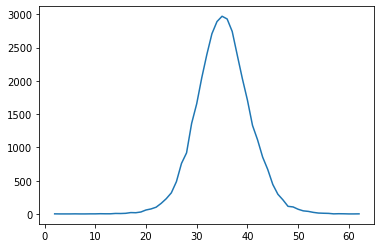

In [4]:
plt.plot(Co.iloc[:,0],Co.iloc[:,1],label=Co)
plt.show()
x=Co.iloc[:61,0]
y=Co.iloc[:61,1]


<class 'pandas.core.series.Series'>


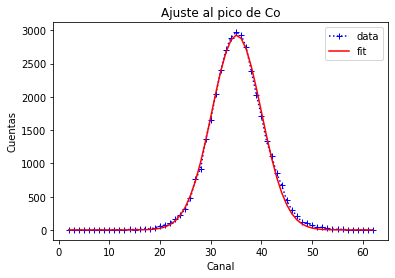

el centro de la gausiana es:  35.10739616175768  ±  0.0009629316328809742
[2928.64873039   35.10739616    4.8846219 ]


In [5]:
mean = sum(x * y) / sum(y)
sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))
print(type(x))
def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(Gauss, x, y, p0=[max(y), mean, sigma])
type(x)

plt.plot(x, y, 'b+:', label='data')
plt.plot(x, Gauss(x, *popt), 'r-', label='fit')
plt.legend()
plt.title('Ajuste al pico de Co')
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.show()

print("el centro de la gausiana es: ",popt[1]," ± ", pcov[1,1])
print(popt)

### **Ni:**

(2, 241) <class 'numpy.ndarray'>


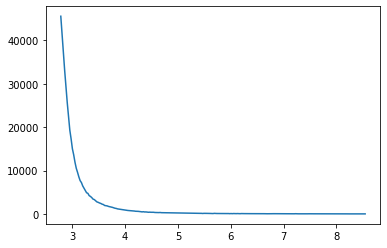

In [6]:
file=open("Ni.txt","r")          #recortamos a partir de la exponencial_ canal_115


Ni= open("Nii.txt","w+")             #creamos un archivo para escribir (w+) los datos con "."
for a in file:                          #type(a)=string
    b=a.replace(',', '.')               #hacemos que a los string con "," los reemplace por "."
    Ni.write(b)                      #le decimos que escriba los strings b en en el nuevo archivo
Ni.close()
data=np.loadtxt('Nii.txt',unpack=True)     #hacemos que nos lea los datos con "." como un vector
print(data.shape,type(data))
x=data.transpose()                         #como data es vector de 2 filas y 256 columnas lo trasponemos
Ni=pd.DataFrame(x)                       #lo convertimos en un dataframe

plt.plot(Ni.iloc[4:,0]*0.0244140625,Ni.iloc[4:,1])
plt.show()



In [7]:
110*0.0244140625

2.685546875

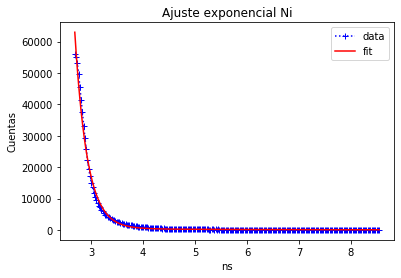

[5.57795847e+04 2.36689552e-01 5.09945068e+02 2.47443689e+00
 6.69630928e+03 2.36695672e-01]


In [8]:
x=Ni.iloc[0:,0]*0.0244140625
y=Ni.iloc[0:,1]
# plt.plot(x,y)
def exp(x,N1,tau1,N2,tau2,N3,tau3):
    return N1*np.exp(-(x-2.685546875)/tau1)+N2*np.exp(-(x-2.685546875)/tau2)+N3*np.exp(-(x-2.685546875)/tau3)
popt,pcov=curve_fit(exp,x,y,p0=[51520,0.180,4600,1.45,3700,0.36])        #50000*np.exp(1/(1.01*x-523)))
plt.plot(x, y, 'b+:', label='data')
plt.plot(x, exp(x, *popt), 'r-', label='fit')
plt.legend()
plt.title('Ajuste exponencial Ni')
plt.xlabel('ns')
plt.ylabel('Cuentas')
plt.show()
print(popt)
# print(Ni.iloc[0:20,:],x.iloc[0:20])

### **PolimA:**

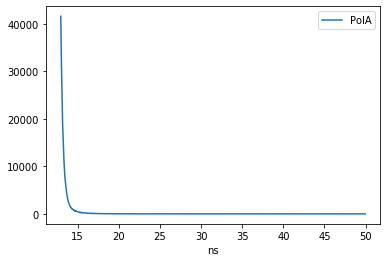

In [9]:
plt.plot(PolA.iloc[529:2046,0],PolA.iloc[529:2046,1],label="PolA")   #a partir de 529 (5 canales de la calibracion)
plt.legend()
plt.xlabel("ns")
plt.show()



In [10]:
529*0.0244140625

12.9150390625

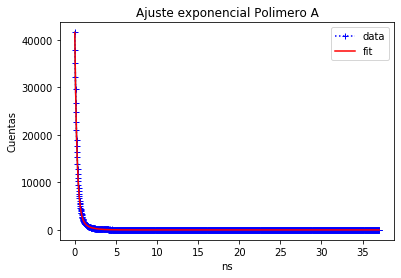

N1:  37855.09116700195  tau1:  0.2622834353397742 N2:  3661.781494353722 tau2:  0.980266484192907
[[ 2.84035509e+03  1.86588818e-02 -2.92354742e+03  4.44345599e-01]
 [ 1.86588818e-02  1.85445349e-07 -2.25235217e-02  3.12394265e-06]
 [-2.92354742e+03 -2.25235217e-02  3.24412758e+03 -4.84189164e-01]
 [ 4.44345599e-01  3.12394265e-06 -4.84189164e-01  7.89713821e-05]]


In [11]:
cut_Ni=PolA.iloc[529:2046,1]
xx=np.arange(len(cut_Ni))*0.0244140625
plt.plot(xx,cut_Ni)

def exp(xx,N1,tau1,N2,tau2):
#     N2=3.27160904e+03

    return N1*np.exp(-(xx)/tau1)+N2*np.exp(-(xx)/tau2)
popt,pcov=curve_fit(exp,xx,cut_Ni,p0=[40000,0.12,3270,1])        #50000*np.exp(1/(1.01*x-523)))
plt.plot(xx, cut_Ni, 'b+:', label='data')
plt.plot(xx, exp(xx, *popt), 'r-', label='fit')
plt.legend()
plt.title('Ajuste exponencial Polimero A')
plt.xlabel('ns')
plt.ylabel('Cuentas')
plt.show()
print("N1: ", popt[0]," tau1: ", popt[1], "N2: ", popt[2], "tau2: ", popt[3])
print(pcov)



**intentamos sin modificar tanto los datos pero el mismo ajuste:**

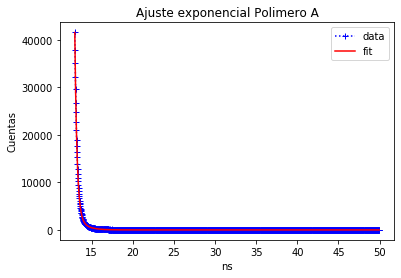

N1:  39244.33546250635  tau1:  0.26228343378917224 N2:  3697.264639438378 tau2:  0.9802664513983615
[[ 2.84942043e+03  1.83435908e-02 -2.95371262e+03  4.43806058e-01]
 [ 1.83435908e-02  1.85445408e-07 -2.28554254e-02  3.12394296e-06]
 [-2.95371262e+03 -2.28554254e-02  3.34297784e+03 -4.91753781e-01]
 [ 4.43806058e-01  3.12394296e-06 -4.91753781e-01  7.89713659e-05]]


In [12]:
x=PolA.iloc[529:2046,0]
y=PolA.iloc[529:2046,1]
# plt.plot(x,y)

# plt.plot(x,y)
def exp(x,N1,tau1,N2,tau2):
#     N2=3.27160904e+03

    return N1*np.exp(-(x-12.93)/tau1)+N2*np.exp(-(x-12.93)/tau2)
popt,pcov=curve_fit(exp,x,y,p0=[40000,0.12,3270,1])        #50000*np.exp(1/(1.01*x-523)))
plt.plot(x, y, 'b+:', label='data')
plt.plot(x, exp(x, *popt), 'r-', label='fit')
plt.legend()
plt.title('Ajuste exponencial Polimero A')
plt.xlabel('ns')
plt.ylabel('Cuentas')
plt.show()
print("N1: ", popt[0]," tau1: ", popt[1], "N2: ", popt[2], "tau2: ", popt[3])
print(pcov)

In [13]:
PolA.iloc[529,0]


12.939453125

### **PolimB:**

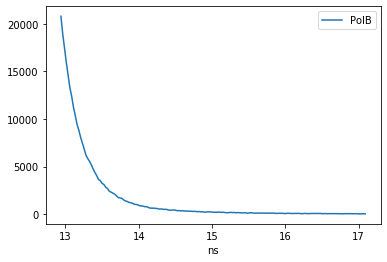

             0    0.1
520  12.719727  23024
521  12.744141  25288
522  12.768555  26722
523  12.792969  27707
524  12.817383  26824
525  12.841797  26928
526  12.866211  25638
527  12.890625  24011
528  12.915039  22354
529  12.939453  20796


In [14]:
plt.plot(PolB.iloc[529:700,0],PolB.iloc[529:700,1],label="PolB")   #recortamos el espectro en la exp: canal 529
plt.legend()
plt.xlabel("ns")
plt.show()

print(PolB.iloc[520:530,])

In [15]:
529*0.0244140625

12.9150390625

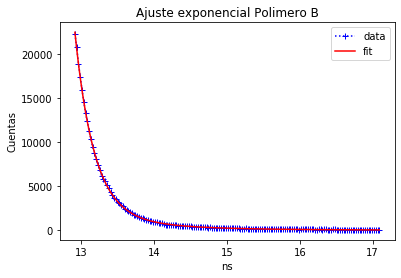

N1:  47603.29127908519  tau1:  0.2599113062646909 N2:  2565.3207159177673 tau2:  0.9370098304900608
[[ 1.70681992e+04 -3.14959952e-02 -4.23687458e+03  1.16303419e+00]
 [-3.14959952e-02  2.01882735e-06 -2.01205832e-01  3.35875451e-05]
 [-4.23687458e+03 -2.01205832e-01  2.37888238e+04 -4.25397169e+00]
 [ 1.16303419e+00  3.35875451e-05 -4.25397169e+00  8.09519305e-04]]


In [16]:
x=PolB.iloc[528:700,0]
y=PolB.iloc[528:700,1]

def exp(x,N1,tau1,N2,tau2):
    return N1*np.exp(-(x-12.696)/tau1)+N2*np.exp(-(x-12.696)/tau2)
popt,pcov=curve_fit(exp,x,y,p0=[40000,0.26,5000,0.94])        #50000*np.exp(1/(1.01*x-523)))
plt.plot(x, y, 'b+:', label='data')
plt.plot(x, exp(x, *popt), 'r-', label='fit')
plt.legend()
plt.title('Ajuste exponencial Polimero B')
plt.xlabel('ns')
plt.ylabel('Cuentas')
plt.show()
print("N1: ", popt[0]," tau1: ", popt[1], "N2: ", popt[2], "tau2: ", popt[3])
print(pcov)


In [17]:
print(x)

528    12.915039
529    12.939453
530    12.963867
531    12.988281
532    13.012695
         ...    
695    16.992188
696    17.016602
697    17.041016
698    17.065430
699    17.089844
Name: 0, Length: 172, dtype: float64


### Exponencial a ajustar:

N(t) = ∑N0e(−t/τi)   +   N2*np.exp(-x/tau2)  N2,tau2   ,30000,1

In [18]:
(4+109)*0.024

# x=list(range(524,700))
# x=np.array(x)
# plt.plot(x,50000*np.exp(1/(1.01*x-523)))


2.712